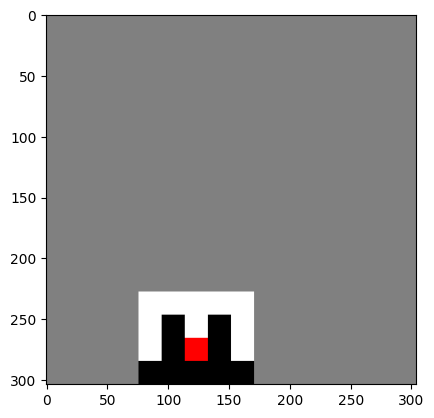

In [1]:
# example environment with partial visibility

import gymnasium as gym
from cair_maze.envs.maze_env import Settings

settings = Settings()
settings.radius = 2
settings

env = gym.make("cair_maze:MazeEnv-v0", render_mode="jupyter",
               width=16, height=16, settings=settings)
env.reset();

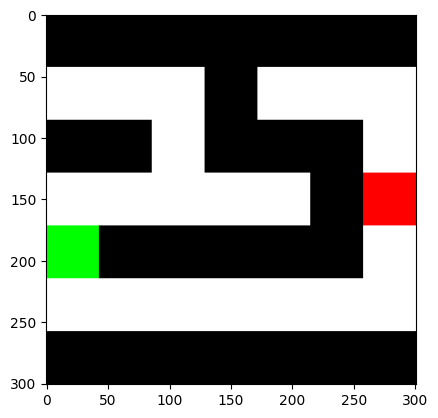

In [2]:
# to check that model is correctly training, start with simpler maze

# maze_generator = "randomized_prim"
env = gym.make("cair_maze:MazeEnv-v0", render_mode="jupyter",
               width=7, height=7, maze_generator="recursive_backtracking")
env.reset();

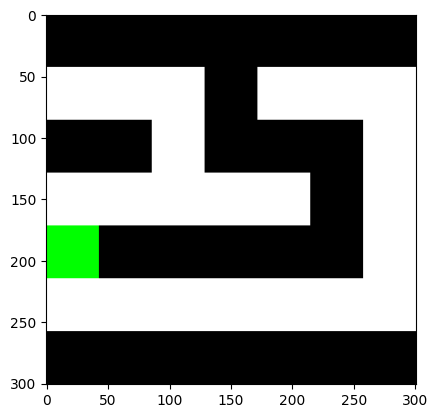

Shortest path took 9 moves


In [3]:
env.solve()

In [4]:
from dream.dream import Dream
from dream.memory import ReplayMemory
from dream.util import config_class

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

config = config_class(
    history_length=1,
    batch_size=16,
    screen_width=84,
    screen_height=84,
    screen_dim=1,
    action_size=4,
    cnn_format="N/A",
    memory_size=1000
)

memory = ReplayMemory(config)
dream = Dream(config, memory)

input action shape = (None, 4)
input image shape = (None, 84, 84, 1)
Metal device set to: Apple M1
encoded image shape = (None, 64)
encoded action shape = (None, 64)
output.shape = (None, 84, 84, 1)


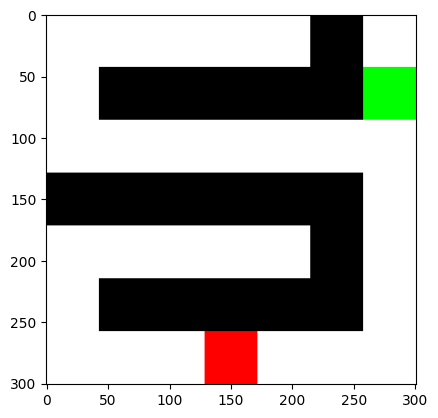

prestates.shape = (16, 84, 84, 1)
poststates.shape = (16, 84, 84, 1)
actions.shape = (16, 4)
1/1 [==============================] - 0s 250ms/step - loss: 35536.8750 - accuracy: 0.4205


In [5]:
import random
import numpy as np
import cair_maze

observation, info = env.reset()
state = info["image"]

# for step in range(0, 1000000000000):
for step in range(0, 20):
    action = random.randint(0, 3)
    observation, reward, terminal, _, info = env.step(action)
    state = info["image"]
    state = np.expand_dims(rgb2gray(state), 2)

    # Add sample to replay buffer
    memory.add(state, reward, action, terminal)

    # if step > 50:
    if step > 5:
        dream.train()

    if step > 50 and step % 500 == 0:
        dream.test()

    if terminal:
        observation, info = env.reset()
        state = info["image"]